# A* ("A-étoile" ou "A-star") 
* Un des algorithmes phares de l'IA
* Inventé par Hart, Nilsson et Raphael en 1968
* Catégorie : optimisation combinatoire
* Résoud une tache de planification : trouver le plus court chemin entre un noeud initial et un noeud cible dans un graphe (éventuellement pondéré)
* Amélioration de l'algorithme de Dijkstra au moyen d'une heuristique 

## Exemples
* Navigation
* Itineraires routiers, logistique
* Résolution de labyrinthe
* Prise de décision dans les jeux vidéos
* Planification industrielle, optimisation de processus industriels

## Definitions

### Graphe

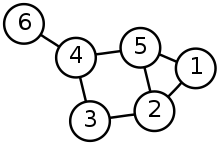

Couple $G=(V,E)$ où 
* $V$ un ensemble de $n$ noeuds (ou sommets) $\{1,\dots,n\}$ 
* $E\subseteq V\times V$ un ensemble de $m$ aretes reliant un noeud source et un noeud cible. 
Dans un graphe pondéré, chaque couple $(i,j) \in V^2$ reçoit un poids $w_{ij}$ cordistpondant au "coût" de la transition du noeud $i$ au noeud $j$. 
> Lorsqu'il n'existe aucune arête $(i,j)$, on peut associer par convention un poids infini à $(i,j)$ pour signifier que cette transition est impossible
* La matrice $W=[w_{ij}]_{i,j}$ définit complètement $G$ et est appelée "matrice d'adjacence" du graphe

### Chemin
 
Un chemin est une liste (=suite) de $m$ transitions $(v_1,v_2),(v_2,v_3),\dots,(v_{m},v_{m+1})$ de poids fini, c'est à dire $(v_i,v_{i+1})\in E$. 

Le coût d'un chemin est la somme des poids de ses transitions. 

Un plus court chemin entre $a$ et $b$ est un chemin tel que tous les autdist chemins de $a$ à $b$ dans $G$ ont un coût supérieur ou égal 

NOTE : il peut y en avoir plusieurs !



# Rappels : parcours d'un graphe

Parcourir un graphe, c'est énumérer ses noeuds en partant d'un noeud initial donné, et en exploitant
* seulement les arêtes existantes 
* chaque arête au plus une fois

Si le graphe comporte des cycles (= chemins qui comporte le même noeud plus d'une fois), le parcours d'un graphe necessite une structure de mémorisation des noeuds visités

## Parcours en profondeur

* Parcours recursivement tous les noeuds du graphe
* Structure de mémorisation = pile

## Parcours en largeur

* Parcours exhaustivement les noeuds du graphe, en visitant tous les noeuds de profondeur $d$ (=accessibles via $d$ transitions) AVANT le noeuds de profondeur $d+1$.
* Structure de mémorisation = file


# TP - Resolution de labyrinthe


In [ ]:
from IPython.core.display import display, HTML, clear_output
from math import isinf, sqrt
import time

In [ ]:
terrain0 = """
┏━━━━━━━━━━━━━━━━━━━━┓
┃                    ┃
┃                    ┃
┃                    ┃
┃                    ┃
┃o               +   ┃
┃                    ┃
┃                    ┃
┃                    ┃
┃                    ┃
┗━━━━━━━━━━━━━━━━━━━━┛
"""
terrain1 = """
┏━━━━━━━━━━━━━━━━━━━━┓
┃   XXXXXX           ┃
┃   X    X           ┃
┃   X  + X           ┃
┃   X    X           ┃
┃   X                ┃
┃   XXXXXXXXXXXXXXXX ┃
┃                    ┃
┃o                   ┃
┗━━━━━━━━━━━━━━━━━━━━┛
"""
terrain2 = """
┏━━━━━━━━━━━━━━━━━━━━┓
┃                  + ┃
┃  -----       -     ┃
┃  ------    ------- ┃
┃   -----     ------ ┃
┃    ----       --   ┃
┃    -------         ┃
┃    --              ┃
┃o                   ┃
┗━━━━━━━━━━━━━━━━━━━━┛
"""
terrain3 = """
┏━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                         ┃
┃ XXXXXXXXXXXXXXXXXXXXXX  ┃
┃ X                    X  ┃
┃ X                    X  ┃
┃ X                    X  ┃
┃ X                    X  ┃
┃ X                    X  ┃
┃ X                    X  ┃
┃o                     X +┃
┃ X                    X  ┃
┃ X                    X  ┃
┃ X                    X  ┃
┃ X                    X  ┃
┃ X                    X  ┃
┃ X                    X  ┃
┃ X                    X  ┃
┃ X                    X  ┃
┃ XXXXXXXXXXXXXXXXXXXXXX  ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━┛
"""
terrain = terrain3

terrain = [x[1:-1] for x in terrain.split("\n")[2:-2]]
w,h = len(terrain[0]),len(terrain)
terrain = [x for r in terrain for x in r]

depart = terrain.index('o')
but = terrain.index('+')

def voisins(x):
    ret=[]
    if x % w != 0 and terrain[x-1] != 'X':
        ret.append(x-1)
    if x % w != w-1 and terrain[x+1] != 'X':
        ret.append(x+1)
    if x // w != 0 and terrain[x-w] != 'X':
        ret.append(x-w)
    if x // w != h-1 and terrain[x+w] != 'X':
        ret.append(x+w)
    return ret

def cout(a,b):
    return 10 if terrain[b]=='-' else 1

w,h

In [ ]:
def reconstruire_chemin(pred):
    x = but
    chemin = []
    while x != depart:
        chemin.insert(0, x)
        x = pred[x]
    return chemin

In [ ]:
def show(dist, chemin=None, heuristique=None):
    def color(x,t,c):
        _color = {"X":"black", " ":"white", "o":"purple", "+":"green", '-':'grey'}
        if c:
            return 'green'
        if t in ' -':
            s = 50 if t in ' ' else 30
            return f'hsla({(1-x/(w*h))*800+100},100%,{s}%,0.5)'
        return _color[t]
    dist = [ float('inf') if x == False else 0 if x == True else x for x in dist ]
    _chemin = [False for _ in terrain]
    if chemin:
        for x in chemin:
            _chemin[x] = True
    _file = file if not heuristique else [(x,heuristique(x)) for x in file]
    display(HTML(f'<h2>{_file}</h2>' +
        '<table style="border-collapse:collapse;color:black">' + "".join([f'''<tr>{"".join([
        "".join([f"""<td style='width:30px;height:30px;overflow:hidden;text-align:center;border:1px solid black;background:{color(x,t,c)}'>
            {x}
        </td>""" for x,t,c in r])
        ])}</tr>''' for r in [list(zip(dist,terrain,_chemin))[i*w:(i+1)*w] for i in range(0,h)]]) + '</table>'))
    clear_output(True)
    


# Parcours en largeur

In [ ]:
pred = [-1 for _ in terrain]
vu = [False for _ in terrain]

file = [depart]
vu[depart] = True

def BFS():
    while len(file):
        x = file.pop(0)
        if terrain[x] == '+':
            return
        for v in voisins(x):
            if not vu[v]:
                file.append(v)
                pred[v] = x
                show(vu)
                time.sleep(.1)
                vu[v] = True
        

BFS()
if pred[but] != -1:
    show(vu, reconstruire_chemin(pred))
else:
    print("Impossible de rejoindre le but")

# Algorithme de Dijkstra

In [ ]:
dist = [float('inf') for _ in terrain]
pred = [-1 for _ in terrain]
vu = [False for _ in terrain]

dist[depart] = 0
file = [depart]

def Dijkstra():
    while len(file):
        x = file.pop(0)
        for v in voisins(x):
            if (not vu[v] and dist[v] > dist[x] + cout(x,v)):
                dist[v] = dist[x] + cout(x,v)
                file.append(v)
                file.sort(key=lambda x: dist[x])
                pred[v] = x
                show(dist)
                time.sleep(.1)
                if terrain[v] == '+':
                    return
        vu[x] = True
        

Dijkstra()
if pred[but] != -1:
    show(dist, reconstruire_chemin(pred))
else:
    print("Impossible de rejoindre le but")

# A*

In [ ]:
dist = [float('inf') for _ in terrain]
pred = [-1 for _ in terrain]
vu = [False for _ in terrain]

dist[depart] = 0
file = [depart]

def heuristique(a):
    x,y = a%w,a//w
    xbut,ybut = but%w,but//w
    return sqrt((xbut-x)**2 + (ybut-y)**2)

def Astar():
    while len(file):
        x = file.pop(0)
        for v in voisins(x):
            if (not vu[v] and dist[v] > dist[x] + cout(x,v)):
                dist[v] = dist[x] + cout(x,v)
                file.append(v)
                file.sort(key=lambda x: dist[x] + heuristique(x))
                pred[v] = x
                show(dist, heuristique=heuristique)
                time.sleep(.1)
                if terrain[v] == '+':
                    return
        vu[x] = True
        

Astar()
if pred[but] != -1:
    show(dist, reconstruire_chemin(pred))
else:
    print("Impossible de rejoindre le but")

A* est un exemple de "recherche informée"

A* est à la fois
- complet (il trouve toujours un chemin si il en existe un)
- optimal (il trouve toujours le plus court) 
SEULEMENT si l'heuristique est **admissible**

# Definition : heuristique admissible

Une heuristique est admissible ssi elle ne surestime jamais la distance réelle au but

exemple trivial : $h(x) = 0$ (Dijkstra)

# A vous de jouer

1. Trouvez un exemple d'heuristique non-admissible
2. Lancez A* avec cette heuristique. Que se passe-t-il ?
3. Implementez la variante WA* (Weighted A-star) qui consiste à multiplier l'heuristique par un poids constant $w$. Comment se comporte l'algorithme obtenu ? Quels sont ses avantages et inconvenients ? Quel lien pouvez-vous faire avec la notion d'admissibilité ?
4. Plus dur : montrez que A* n'est jamais plus lent que Dijkstra (en terme de nombre de noeuds visités)

# Voir aussi 

* https://ratheil.info/myPublicThesis/masters/2016_KoubouratouIdjaton--Houndji.pdf
* https://www.youtube.com/watch?v=g024lzsknDo
* http://chl.be/glmf/cd_glmf_100/54/GLMF_054_032_041.pdf
